In [1]:
# Ref: SciPy Hierarchical Clustering and Dendrogram Tutorial
# https://joernhees.de/blog/2015/08/26/scipy-hierarchical-clustering-and-dendrogram-tutorial/

In [2]:
# X samples (n x m array), aka data points or "singleton clusters"
# n number of samples
# m number of features
# Z cluster linkage array (contains the hierarchical clustering information)
# k number of clusters

In [5]:
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
import numpy as np

# for notebook
%matplotlib inline
np.set_printoptions(precision=5, suppress=True)

<class 'numpy.ndarray'>
(150, 2)


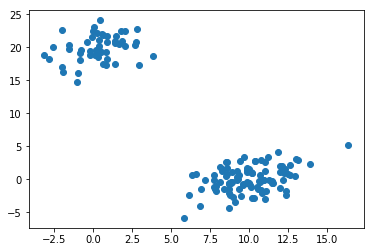

In [20]:
# generate 2 clusters randomly, by multivariate normal distribution
np.random.seed(4711)
a = np.random.multivariate_normal([10, 0], [[3, 1], [1, 4]], size=[100,])
b = np.random.multivariate_normal([0, 20], [[3, 1], [1, 4]], size=[50,])
X = np.concatenate((a, b),)

print (type(a))
print (X.shape)
plt.scatter(X[:,0], X[:,1])
plt.show()

In [21]:
# Start hierarchical clustering

# generate the linkage matrix
# 
# the linkage() function will use that method and metric to calculate the distances of the clusters (starting with your n individual samples (aka data points) as singleton clusters)) 
# and in each iteration will merge the two clusters which have the smallest distance according the selected method and metric. 
# It will return an array of length n - 1 giving you information about the n - 1 cluster merges which it needs to pairwise merge n clusters. 
# Z[i] will tell us which clusters were merged in the i-th iteration
Z = linkage(X, 'ward')

In [22]:
print(Z)

[[ 52.       53.        0.04151   2.     ]
 [ 14.       79.        0.05914   2.     ]
 [ 33.       68.        0.07107   2.     ]
 [ 17.       73.        0.07137   2.     ]
 [  1.        8.        0.07543   2.     ]
 [ 85.       95.        0.10928   2.     ]
 [108.      131.        0.11007   2.     ]
 [  9.       66.        0.11302   2.     ]
 [ 15.       69.        0.11429   2.     ]
 [ 63.       98.        0.1212    2.     ]
 [107.      115.        0.12167   2.     ]
 [ 65.       74.        0.1249    2.     ]
 [ 58.       61.        0.14028   2.     ]
 [ 62.      152.        0.1726    3.     ]
 [ 41.      158.        0.1779    3.     ]
 [ 10.       83.        0.18635   2.     ]
 [114.      139.        0.20419   2.     ]
 [ 39.       88.        0.20628   2.     ]
 [ 70.       96.        0.21931   2.     ]
 [ 46.       50.        0.22049   2.     ]
 [109.      113.        0.22499   2.     ]
 [ 31.       80.        0.23286   2.     ]
 [ 22.      150.        0.23608   3.     ]
 [ 28.     

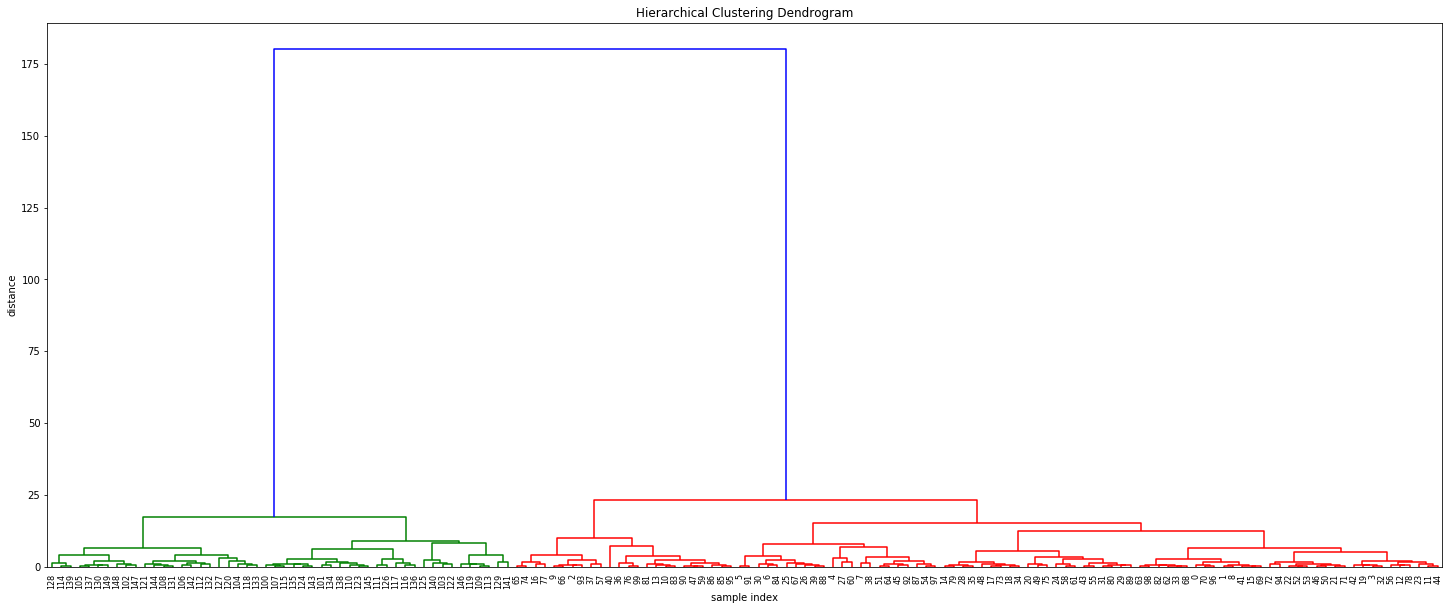

In [23]:
# plot dendrogram

plt.figure(figsize=(25, 10))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('sample index')
plt.ylabel('distance')
dendrogram(
    Z,
    leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=8.,  # font size for the x axis labels
)
plt.show()

In [26]:
# find out the distance in last 5 clusters
print(Z[-5:, 2])

[ 12.42735  15.11533  17.11527  23.12199 180.27043]


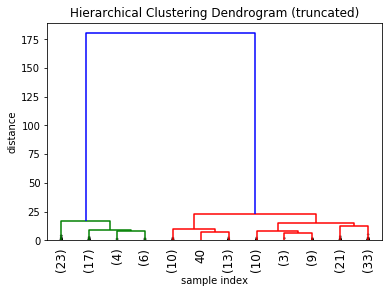

In [32]:
# Dendrogram truncation

# show last p=12 (ie last 12 merges)
plt.title('Hierarchical Clustering Dendrogram (truncated)')
plt.xlabel('sample index')
plt.ylabel('distance')
dendrogram(
    Z,
    truncate_mode='lastp',  # show only the last p merged clusters
    p=12,  # show only the last p merged clusters
    show_leaf_counts=True,  # otherwise numbers in brackets are counts
    leaf_rotation=90.,
    leaf_font_size=12.,
    show_contracted=True,  # to get a distribution impression in truncated branches
)
plt.show()

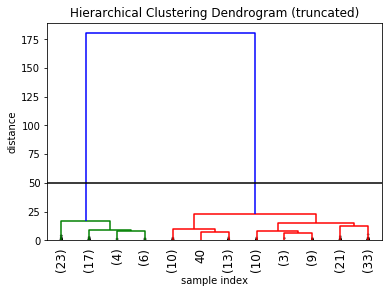

In [33]:
# Selecting a Distance Cut-Off aka Determining the Number of Clusters

# set cut-off to 50
max_d = 50  # max_d as in max_distance


plt.title('Hierarchical Clustering Dendrogram (truncated)')
plt.xlabel('sample index')
plt.ylabel('distance')
dendrogram(
    Z,
    truncate_mode='lastp',  # show only the last p merged clusters
    p=12,  # show only the last p merged clusters
    show_leaf_counts=True,  # otherwise numbers in brackets are counts
    leaf_rotation=90.,
    leaf_font_size=12.,
    show_contracted=True,  # to get a distribution impression in truncated branches
)
plt.axhline(y=max_d, c='k')
plt.show()

In [39]:
# Retrieve the clusters

from scipy.cluster.hierarchy import fcluster

# find by max_d
maxDClusters = fcluster(Z, max_d, criterion='distance')
maxDClusters

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

In [41]:
# find by k (number of clusters)
k = 3
kClusters = fcluster(Z, k, criterion="maxclust")
kClusters

array([3, 3, 2, 3, 3, 3, 3, 3, 3, 2, 2, 3, 3, 2, 3, 3, 2, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 3, 3, 2, 3, 3, 3,
       3, 3, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 2, 3, 3, 3, 3, 3, 2,
       2, 3, 3, 3, 3, 3, 3, 3, 2, 3, 2, 2, 3, 3, 3, 2, 3, 2, 3, 2, 2, 3,
       3, 3, 2, 3, 3, 2, 3, 2, 3, 3, 3, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

In [42]:
# find by inconsistent method (default "criterion")
inconsistentClusters = fcluster(Z,8, depth=10)
inconsistentClusters

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

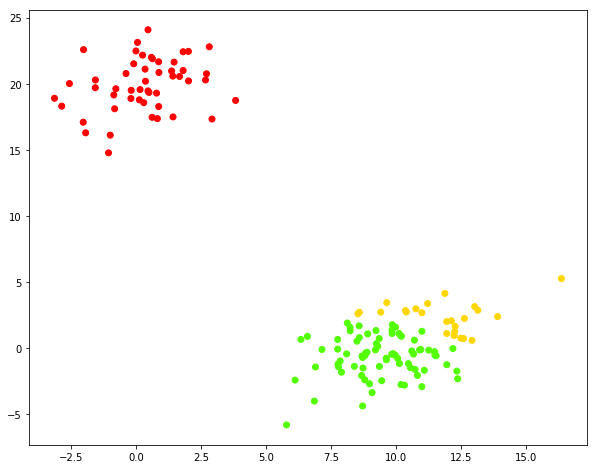

In [43]:
# visualization
plt.figure(figsize=(10, 8))
plt.scatter(X[:,0], X[:,1], c=kClusters, cmap='prism')  # plot points with cluster dependent colors
plt.show()